<a href="https://colab.research.google.com/github/wlsisl/ESAA_22-2/blob/main/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [54]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [55]:
# 데이터 로드
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/ESAA_YB/abalone.csv')

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [56]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [57]:
# train과 test set 분리 (train:test = 7:3 비율로)

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=100)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [58]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score



3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [68]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha = 0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
y_preds = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_preds+1.5

#MSE와 RMSE구하기 
from sklearn.metrics import mean_squared_error 
print('MSE: ',mean_squared_error(y_test, y_preds),'RMSE: ',np.sqrt(mean_squared_error(y_test, y_preds)))

MSE:  4.928389255237459 RMSE:  2.2199975800071177


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요. 

In [61]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [62]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))



alpha 0 일 때 5 folds의 평균 RMSE : 2.201 
alpha 0.1 일 때 5 folds의 평균 RMSE : 2.199 
alpha 1 일 때 5 folds의 평균 RMSE : 2.204 
alpha 10 일 때 5 folds의 평균 RMSE : 2.348 
alpha 100 일 때 5 folds의 평균 RMSE : 2.614 


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [63]:
# 필요한 모듈 임포트
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [69]:
#모델 생성 및 훈련
xgb_reg = XGBRegressor(n_estimators = 1000)
xgb_reg.fit(X_train, y_train)

#예측값 구하기
y_preds2 = xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_preds2 + 1.5

#MSE와 RMSE 구하기
print('MSE: ',mean_squared_error(y_test, y_preds2),'RMSE: ',np.sqrt(mean_squared_error(y_test, y_preds2)))


[10:20:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE:  5.19937410727294 RMSE:  2.280213610009584


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

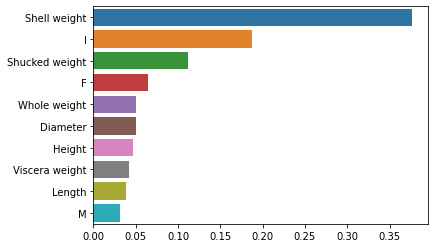

In [70]:
import seaborn as sns
%matplotlib inline

feature_series=pd.Series(data=xgb_reg.feature_importances_, index=data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요. 

In [72]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [73]:
wine = load_wine()

wine_x = wine.data # x변수 
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [74]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape 
y_train.shape 

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [75]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)


LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [50]:
#기울기 
np.round(lr_clf.coef_,1)

array([[-0.2,  0.4,  0.1, -0.2, -0. ,  0.2,  0.5, -0. ,  0.1,  0.1, -0. ,
         0.3,  0. ],
       [ 0.6, -0.8, -0.1,  0.2, -0. ,  0.3,  0.4,  0. ,  0.3, -1.2,  0.3,
         0.5, -0. ],
       [-0.4,  0.4, -0. , -0. ,  0. , -0.5, -0.8, -0. , -0.4,  1.1, -0.2,
        -0.8,  0. ]])

In [51]:
#절편
lr_clf.intercept_

array([-0.04177837,  0.09551046, -0.05373209])

3-3) 모델의 정확도를 구하세요.

In [52]:
from sklearn.metrics import accuracy_score

#모델의 예측값 구하기
lr_preds = lr_clf.predict(x_test)

#모델의 정확도 구하기
accuracy=accuracy_score(y_test, lr_preds)
accuracy

0.9629629629629629